In [0]:
# This will create the sql context to read data and save the data as df - Estamos creando el contexto de SQL para leer y gudar los datos en la variable df
from pyspark.sql import SQLContext
sqlcontext = SQLContext(sc)
df = sqlcontext.sql('select * from train')

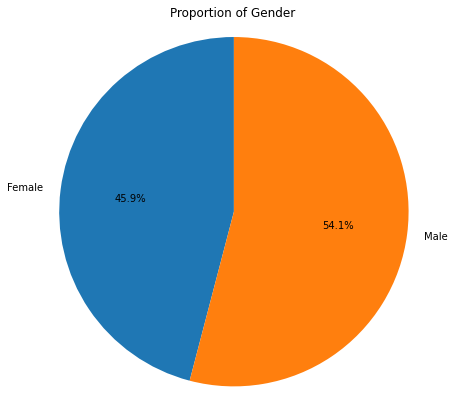

+------+------+
|Gender| count|
+------+------+
|Female|175020|
|  Male|206089|
+------+------+

None


In [0]:
import matplotlib.pyplot as plt # imports matplotlib for data viz
import numpy as np # imports numpy as np
import seaborn as sns # imports seaborn for data viz
g_counts = df.groupBy("Gender").count()
# Collect the counts as a list
counts = [row["count"] for row in g_counts.collect()]
# Get the categories as a list
categories = [row["Gender"] for row in g_counts.collect()]
# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Gender')
# Show the pie chart
plt.show()
print(df.groupBy("Gender").count().show())

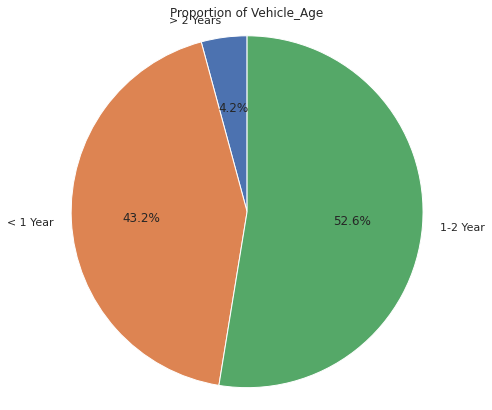

+-----------+------+
|Vehicle_Age| count|
+-----------+------+
|  > 2 Years| 16007|
|   < 1 Year|164786|
|   1-2 Year|200316|
+-----------+------+

None


In [0]:
g_counts = df.groupBy("Vehicle_Age").count()
# Collect the counts as a list
counts = [row["count"] for row in g_counts.collect()]
# Get the categories as a list
categories = [row["Vehicle_Age"] for row in g_counts.collect()]
# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Vehicle_Age')
# Show the pie chart
plt.show()
print(df.groupBy("Vehicle_Age").count().show())

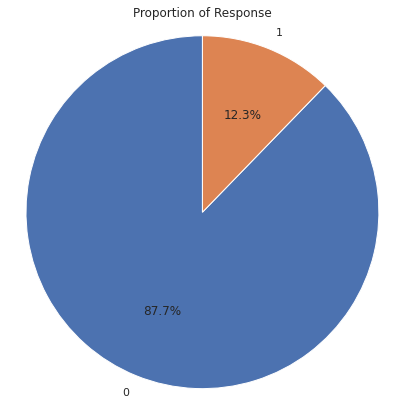

+--------+------+
|Response| count|
+--------+------+
|       0|334399|
|       1| 46710|
+--------+------+

None


In [0]:
g_counts = df.groupBy("Response").count()
# Collect the counts as a list
counts = [row["count"] for row in g_counts.collect()]
# Get the categories as a list
categories = [row["Response"] for row in g_counts.collect()]
# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Response')
# Show the pie chart
plt.show()
print(df.groupBy("Response").count().show())

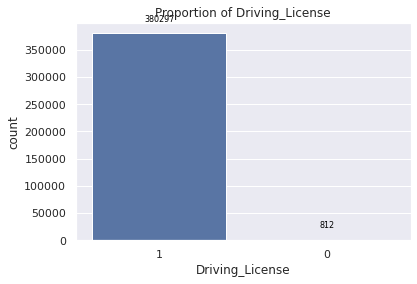

In [0]:
sns.set(style="darkgrid") 
pandas_df = df.select('Driving_License').toPandas()
ax = sns.countplot(x='Driving_License', data = pandas_df)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center",
                va="bottom",
                fontsize=8,
                color="black",
                xytext=(0, 10),
                textcoords="offset points")
                 
#bar_container= ax.bar(df['churn'].value_counts().index, df['churn'].value_counts().values)
#ax.bar_label(bar_container, fmt='{:,.0f}') #crear etiquetas en las barras
ax.set_title('Proportion of Driving_License')

display()

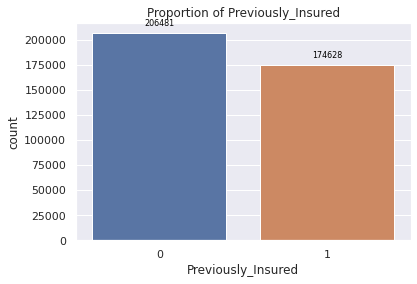

In [0]:
sns.set(style="darkgrid") 
pandas_df = df.select('Previously_Insured').toPandas()
ax = sns.countplot(x='Previously_Insured', data = pandas_df)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center",
                va="center",
                fontsize=8,
                color="black",
                xytext=(0, 10),
                textcoords="offset points")
                 
#bar_container= ax.bar(df['churn'].value_counts().index, df['churn'].value_counts().values)
#ax.bar_label(bar_container, fmt='{:,.0f}') #crear etiquetas en las barras
ax.set_title('Proportion of Previously_Insured')

display()

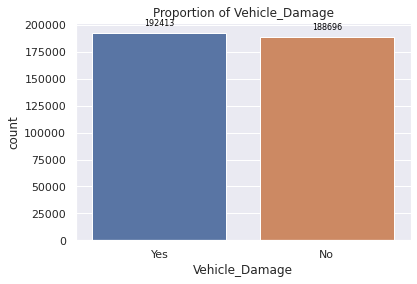

In [0]:
sns.set(style="darkgrid") 
pandas_df = df.select('Vehicle_Damage').toPandas()
ax = sns.countplot(x='Vehicle_Damage', data = pandas_df)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center",
                va="center",
                fontsize=8,
                color="black",
                xytext=(0, 10),
                textcoords="offset points")
                 
#bar_container= ax.bar(df['churn'].value_counts().index, df['churn'].value_counts().values)
#ax.bar_label(bar_container, fmt='{:,.0f}') #crear etiquetas en las barras
ax.set_title('Proportion of Vehicle_Damage')

display()

In [0]:
df.columns

Out[8]: ['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

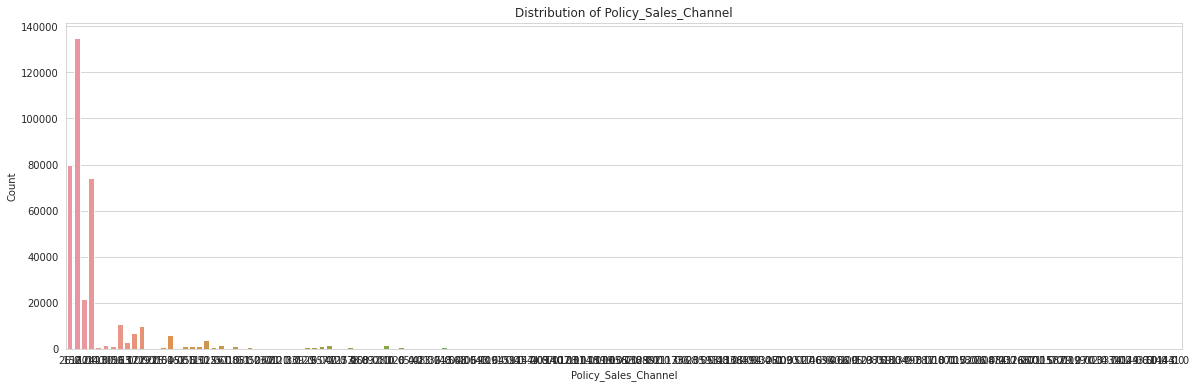

In [0]:
pandas_df = df.select('Policy_Sales_Channel').toPandas()
# Create a bar plot
plt.figure(figsize=(20, 6))
sns.countplot(data=pandas_df, x='Policy_Sales_Channel')

# Set the title and labels
plt.title(f'Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Count')

# Show the plot
plt.show()

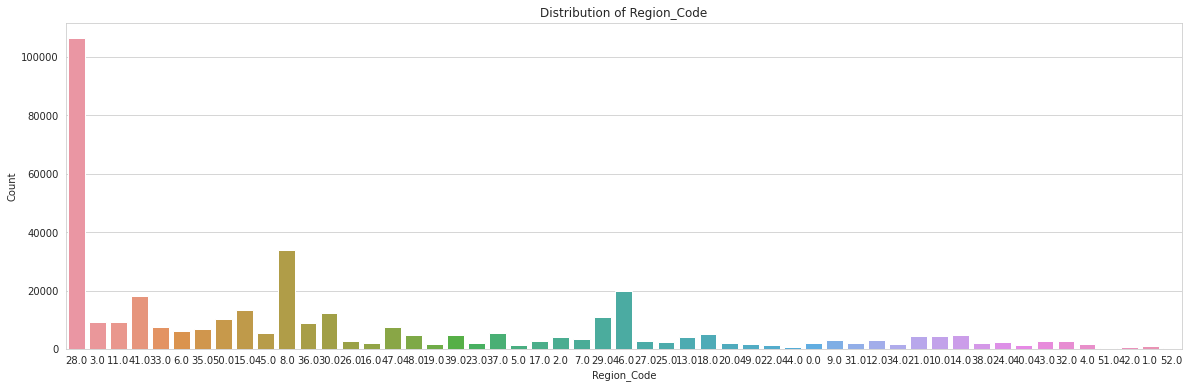

In [0]:
pandas_df = df.select('Region_Code').toPandas()
# Create a bar plot
plt.figure(figsize=(20, 6))
sns.countplot(data=pandas_df, x='Region_Code')

# Set the title and labels
plt.title(f'Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Count')

# Show the plot
plt.show()

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


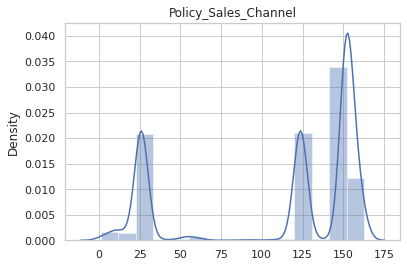

Policy_Sales_Channel = 112.03429465061177


In [0]:
from pyspark.sql.functions import col
df = df.withColumn("Policy_Sales_Channel", col("Policy_Sales_Channel").cast("float"))
premiun = df.select('Policy_Sales_Channel').toPandas()
# Create a distribution plot
ax = sns.distplot(premiun, bins=15)
ax.set_title('Policy_Sales_Channel')
# Display the plot
plt.show()
# Calculate the average Annual_Premium
average = df.agg({"Policy_Sales_Channel": "mean"}).collect()[0][0]
print('Policy_Sales_Channel =', average)

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


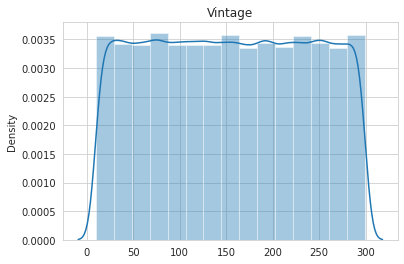

Vintage = 154.34739667654136


In [0]:
premiun = df.select('Vintage').toPandas()
# Create a distribution plot
ax = sns.distplot(premiun, bins=15)
ax.set_title('Vintage')
# Display the plot
plt.show()
# Calculate the average Annual_Premium
average = df.agg({"Vintage": "mean"}).collect()[0][0]
print('Vintage =', average)

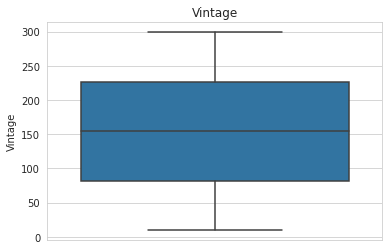

In [0]:
fig, ax = plt.subplots() # creates figure and axes space
sns.set_style("whitegrid") # sets the backgropund to white with grids

pandas_df = df.select('Vintage').toPandas() # selects age and class variables and save it as a pandas df

ax = sns.boxplot(y='Vintage', data = pandas_df) #  create sa box plot

ax.set_title('Vintage') # sets the title of the boxplot

display()

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


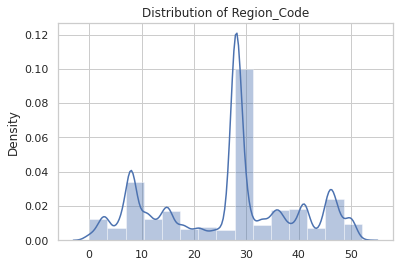

Region_Code = 26.388807401557035


In [0]:
from pyspark.sql.functions import col
df = df.withColumn("Region_Code", col("Region_Code").cast("float"))
premiun = df.select('Region_Code').toPandas()
# Create a distribution plot
ax = sns.distplot(premiun, bins=15)
ax.set_title('Distribution of Region_Code')
# Display the plot
plt.show()
# Calculate the average Annual_Premium
average = df.agg({"Region_Code": "mean"}).collect()[0][0]
print('Region_Code =', average)

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


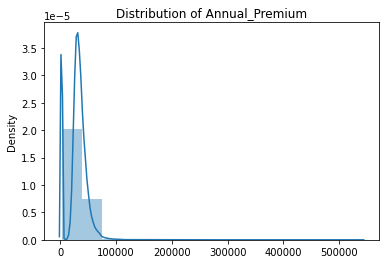

Average Annual_Premium = 30564.389581458323


In [0]:
premiun = df.select('Annual_Premium').toPandas()
# Create a distribution plot
ax = sns.distplot(premiun, bins=15)
ax.set_title('Distribution of Annual_Premium')
# Display the plot
plt.show()
# Calculate the average Annual_Premium
average_premium = df.agg({"Annual_Premium": "mean"}).collect()[0][0]
print('Average Annual_Premium =', average_premium)

In [0]:
# Calculate the 0.25 and 0.75 quantiles for the "Age" column
quantiles = df.approxQuantile("Annual_Premium", [0.25, 0.75], 0.0)
# Display the quantiles
print("25th Percentile (0.25 Quantile):", quantiles[0])
print("75th Percentile (0.75 Quantile):", quantiles[1])

25th Percentile (0.25 Quantile): 24405.0
75th Percentile (0.75 Quantile): 39400.0


In [0]:
df.select('Annual_Premium').where('Annual_Premium > 39400').count()

Out[17]: 95277

In [0]:
print(float(df.select('Annual_Premium').where('Annual_Premium > 39400').count()/df.count()))

0.2499993440196899


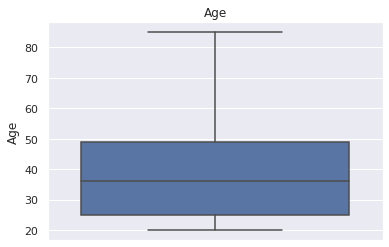

In [0]:
fig, ax = plt.subplots() # creates figure and axes space
sns.set_style("whitegrid") # sets the backgropund to white with grids

pandas_df = df.select('Age').toPandas() # selects age and class variables and save it as a pandas df

ax = sns.boxplot(y='Age', data = pandas_df) #  create sa box plot

ax.set_title('Age') # sets the title of the boxplot

display()

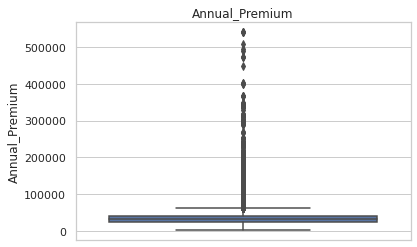

In [0]:
fig, ax = plt.subplots() # creates figure and axes space
sns.set_style("whitegrid") # sets the backgropund to white with grids

pandas_df = df.select('Annual_Premium').toPandas() # selects age and class variables and save it as a pandas df

ax = sns.boxplot(y='Annual_Premium', data = pandas_df) #  create sa box plot

ax.set_title('Annual_Premium') # sets the title of the boxplot

display()